In [26]:
import numpy as np
import pandas as pd
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt

import sys

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import sklearn as sk

In [34]:
cijene = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/cene.parquet", columns=['art','datum','redna_cena','akcijska_cena'])
dostupnost = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/availability.parquet")
kolicina = pd.read_parquet("C:/Users/vvrhovec/Veronika/mdevelop/data/parquet/training/training.prodaja.parquet", columns=['art','datum','kol'])
podaci_0 = pd.merge(cijene, dostupnost, on=['art','datum'], how='inner')
podaci_1 = pd.merge(podaci_0, kolicina, on=['art','datum'], how='inner')
podaci_1.describe()

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


,redna_cena,akcijska_cena,n_trgovin,kol
count,2.165314e+07,2.165315e+07,2.165315e+07,2.165315e+07
mean,4.760987e+00,4.410092e+00,1.099044e+02,7.611472e+01
std,8.968893e+00,7.624160e+00,1.422246e+02,6.429302e+02
min,-2.513000e+00,-4.809700e+01,1.000000e+00,-1.955700e+02
25%,1.500000e+00,1.478000e+00,1.400000e+01,2.000000e+00
50%,2.694000e+00,2.586000e+00,4.100000e+01,6.000000e+00
75%,4.993000e+00,4.895000e+00,1.460000e+02,2.700000e+01
max,2.912189e+03,2.912189e+03,4.720000e+02,1.597320e+05


* Mergamo tablice: 

In [35]:
podaci_0.shape

(28029147, 3)

In [36]:
podaci_1.shape

(21653152, 4)

In [26]:
podaci_1.describe()

,redna_cena,akcijska_cena,n_trgovin,kol
count,2.165314e+07,2.165315e+07,2.165315e+07,2.165315e+07
mean,4.760987e+00,4.410092e+00,1.099044e+02,7.611472e+01
std,8.968893e+00,7.624160e+00,1.422246e+02,6.429302e+02
min,-2.513000e+00,-4.809700e+01,1.000000e+00,-1.955700e+02
25%,1.500000e+00,1.478000e+00,1.400000e+01,2.000000e+00
50%,2.694000e+00,2.586000e+00,4.100000e+01,6.000000e+00
75%,4.993000e+00,4.895000e+00,1.460000e+02,2.700000e+01
max,2.912189e+03,2.912189e+03,4.720000e+02,1.597320e+05


* Uzmimo podatke za artikle koji su broja manjeg od 30

In [10]:
podaci_2 = podaci_1.iloc[podaci_1.index.get_level_values('art') <= 30]

In [11]:
podaci_2.sort_index(inplace=True)

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
# print(podaci_2)

In [13]:
# podaci_3 = podaci_1.loc[podaci_1.index.get_level_values('datum') >= '2018-01-01']

In [14]:
# print(podaci_3)

In [15]:
# sys.getsizeof(podaci_2)

90505798

In [16]:
# dataParquet = podaci_3.to_parquet('preprocPodaci.parquet')

In [17]:
# proba = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/procjena/preprocPodaci.parquet")

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [18]:
# sys.getsizeof(proba)

90150582

* Ispis cijena, dostupnosti i količina po svim datumima, za svaki artikl čiji je broj manji od 30

In [19]:
#for art, new_df in podaci_2.groupby(level=0):
 #   print("artikl:", art, new_df)

* izaberimo pet artikala na kojima ćemo raditi

In [37]:
brojac = 0

for art, new_df in podaci_1.groupby(level=0):
    if brojac == 5:
        break
    if len(new_df.index) > 800:
        brojac = brojac + 1
        print("artikl:", art, "duljina:", len(new_df.index))        

artikl: 38 duljina: 815
artikl: 39 duljina: 869
artikl: 40 duljina: 869
artikl: 41 duljina: 867
artikl: 57 duljina: 801


In [38]:
podaci_4 = podaci_1.loc[[38,39,40,41,57]]

In [39]:
podaci_4.head(100)

redna_cena  akcijska_cena  n_trgovin     kol
art datum                                                   
38  2017-01-16       0.099          0.099        425    58.0
    2018-04-08       0.100          0.100        380   403.0
39  2016-11-28       0.100          0.100        462  2504.0
40  2017-01-14       0.769          0.769        321   137.0
41  2016-01-08       1.631          1.586        176    36.0
38  2018-01-17       0.099          0.099        397    18.0
39  2017-01-19       0.100          0.100        458  3883.0
    2018-01-19       0.100          0.100        449  4024.0
40  2018-04-15       0.769          0.769        258    33.0
39  2017-05-11       0.100          0.100        462  5080.0
40  2017-04-19       0.768          0.768        294    44.0
41  2016-07-16       1.631          1.631        157    38.0
40  2017-07-15       0.769          0.769        233    90.0
38  2017-07-27       0.100          0.100        417   572.0
39  2017-05-09       0.100          0.100        464  3647.0
40  2016-12-23       0.540          0.540        323   665.0
    2017-06-16       0.770          0.431        263   172.0
39  2018-02-25       0.100          0.100        423  1783.0
57  2016-08-28       0.080          0.080         94    23.0
    2017-02-08       0.080          0.080         87    13.0
38  2017-12-24       0.100          0.100        399   353.0
39  2017-09-10       0.100          0.100        440  2348.0
40  2017-11-30       0.769          0.769        301   198.0
41  2017-04-06       1.631          1.631        113    40.0
57  2017-07-21       0.080          0.080         81    59.0
38  2016-03-15       0.100          0.100        443   220.0
40  2016-08-31       0.770          0.513        326   449.0
39  2016-10-27       0.100          0.100        461  3432.0
    2017-05-23       0.100          0.100        462  3766.0
38  2017-02-17       0.100          0.100        422   262.0
...                    ...            ...        ...     ...
39  2016-10-28       0.100          0.100        461  4428.0
40  2017-11-06       0.770          0.770        292    74.0
38  2016-04-30       0.100          0.100        443   735.0
    2017-03-14       0.100          0.100        412   171.0
40  2017-04-05       0.770          0.770        293    98.0
38  2016-09-16       0.100          0.100        447   270.0
39  2016-07-03       0.100          0.100        460  1453.0
    2017-06-03       0.100          0.100        462  9528.0
40  2016-01-19       0.770          0.642        449   212.0
    2016-06-02       0.769          0.769        346   145.0
57  2017-12-17       0.080          0.080         80    30.0
40  2016-02-03       0.770          0.625        449   234.0
57  2017-05-24       0.080          0.080         83    86.0
    2017-11-20       0.081          0.081         79    20.0
38  2016-07-05       0.100          0.100        443   394.0
39  2017-09-21       0.100          0.100        457  5472.0
    2018-01-26       0.100          0.100        456  3854.0
40  2018-04-30       0.769          0.769        258   146.0
41  2016-06-16       1.631          1.631        165    57.0
    2017-12-04       1.631          1.631         98    41.0
40  2016-01-15       0.770          0.597        450   271.0
    2017-06-01       0.769          0.769        265   127.0
    2017-07-30       0.770          0.359        238    73.0
57  2017-08-17       0.080          0.080         81    60.0
38  2017-03-11       0.100          0.100        415   375.0
39  2017-09-02       0.100          0.100        455  6630.0
57  2016-12-12       0.081          0.081         91    36.0
39  2016-12-22       0.100          0.100        463  4726.0
41  2017-07-06       1.632          1.632        101    37.0
38  2016-10-28       0.100          0.100        438   225.0

[100 rows x 4 columns]

In [103]:
# podaci_4.sort_index(inplace=True)

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


* U tablici `podaci_4` je konačna verzija podataka s kojima radim --  prebacujem ju u parquet file.

In [25]:
# sampleirani_podaci = podaci_4.to_parquet('sampleirani_podaci.parquet')

In [26]:
# ucitavanje_sampleiranih_podataka = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/procjena/sampleirani_podaci.parquet")

* Napomena:
> Ne bi bilo loše preimenovati stupce na hrvatski! (pisite kod na engleskom!!!!)

In [27]:
#for art, new_df in podaci_3.groupby(level=0):
 #   if art not in [39,40,41,58,95]:
  #      podaci_4 = podaci_3.drop(art, level=0)

# kod je dobar ali se presporo vrti

## Odvajanje podataka u testni i trening set

In [40]:
finalna_tablica = podaci_4

In [41]:
dataParquet_s = podaci_4.to_parquet('dataParquet_s.parquet')

C:\Users\vvrhovec\AppData\Local\Continuum\miniconda3\envs\okolina\lib\site-packages\pyarrow\pandas_compat.py:114: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  result = infer_dtype(pandas_collection)


In [42]:
podaci_s = pd.read_parquet("C:/Users/vvrhovec/Veronika/kodovi/dataParquet_s.parquet")

In [43]:
print(podaci_s)

                redna_cena  akcijska_cena  n_trgovin     kol
art datum                                                   
38  2017-01-16       0.099          0.099        425    58.0
    2018-04-08       0.100          0.100        380   403.0
39  2016-11-28       0.100          0.100        462  2504.0
40  2017-01-14       0.769          0.769        321   137.0
41  2016-01-08       1.631          1.586        176    36.0
38  2018-01-17       0.099          0.099        397    18.0
39  2017-01-19       0.100          0.100        458  3883.0
    2018-01-19       0.100          0.100        449  4024.0
40  2018-04-15       0.769          0.769        258    33.0
39  2017-05-11       0.100          0.100        462  5080.0
40  2017-04-19       0.768          0.768        294    44.0
41  2016-07-16       1.631          1.631        157    38.0
40  2017-07-15       0.769          0.769        233    90.0
38  2017-07-27       0.100          0.100        417   572.0
39  2017-05-09       0.1

In [29]:
# Ali nećemo birati random

# zavisna = podaci_4['kol']
# X_trainNeSkalirani, X_testNeSkalirani, y_trainNeSkalirani, y_testNeSkalirani = train_test_split(podaci_4, zavisna, test_size=0.2, random_state=2)
# print (X_trainNeSkalirani.shape, y_trainNeSkalirani.shape)
# print (X_testNeSkalirani.shape, y_testNeSkalirani.shape)

* Kako bi se izbjeglo da treniramo podatke na podacima koji su u budućnosti, ručno ćemo odvojiti podatke t.d u trening setu ostavimo podatke iz prvog četveromjesečja.

In [44]:
X_train = podaci_s.loc[podaci_s.index.get_level_values('datum') <= '2018-01-01']
X_test = podaci_s.loc[podaci_s.index.get_level_values('datum') > '2018-01-01']
y_train = X_train['kol']
y_test = X_test['kol']

In [45]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3535, 4) (3535,)
(686, 4) (686,)


In [46]:
X_train.loc[38].sort_index(inplace=False)

,redna_cena,akcijska_cena,n_trgovin,kol
datum,,,,
2016-01-02,0.100,0.100,439,769.0
2016-01-03,0.100,0.100,436,100.0
2016-01-04,0.100,0.100,441,305.0
2016-01-05,0.100,0.100,441,79.0
2016-01-06,0.100,0.100,444,344.0
2016-01-07,0.100,0.100,441,97.0
2016-01-08,0.100,0.100,442,311.0
2016-01-09,0.100,0.100,443,541.0
2016-01-10,0.100,0.100,441,94.0


In [47]:
X_test.loc[40].sort_index(inplace=False)

,redna_cena,akcijska_cena,n_trgovin,kol
datum,,,,
2018-01-02,0.768,0.768,291,30.0
2018-01-03,0.769,0.769,291,76.0
2018-01-04,0.769,0.769,291,103.0
2018-01-05,0.770,0.770,294,138.0
2018-01-06,0.769,0.769,293,120.0
2018-01-07,0.769,0.769,293,41.0
2018-01-08,0.769,0.769,294,87.0
2018-01-09,0.768,0.768,295,54.0
2018-01-10,0.769,0.769,296,86.0


* Skaliramo test set:

In [48]:
scaler = StandardScaler()

In [49]:
#skaler = RobustScaler()

>StandardScaler(copy=True, with_mean=True, with_std=True)

In [181]:
print(scaler.fit(X_test))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [182]:
X_testSkalirani = scaler.transform(X_test)

In [183]:
print(scaler.fit(y_test.values.reshape(-1,1)))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [184]:
#y_testSkalirani = scaler.transform(y_test.values.reshape(-1,1))

In [204]:
#print(X_testSkalirani)

In [205]:
#print(y_testSkalirani)

* Skaliramo trening set:

In [187]:
print(scaler.fit(X_train),scaler.fit(y_train.values.reshape(-1,1)))

StandardScaler(copy=True, with_mean=True, with_std=True) StandardScaler(copy=True, with_mean=True, with_std=True)


In [188]:
X_trainSkalirani = scaler.transform(X_train)
y_trainSkalirani = scaler.transform(y_train.values.reshape(-1,1))

### Preprocesiranje **TRAINING** podataka

In [50]:
std_scaler = StandardScaler()

In [51]:
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [52]:
X_train_scaled = std_scaler.transform(X_train)

### Fittamo model na podacima trening seta

In [53]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train_scaled, y_train)

In [54]:
predictions = model.predict(X_train_scaled)

In [55]:
model.score(X_train_scaled, y_train)

1.0

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [57]:
mae = mean_absolute_error(y_train, predictions)
mae

3.9952802970739347e-13

In [58]:
mse = mean_squared_error(y_train, predictions)
mse

2.1713856700367645e-25

### TEST 

In [59]:
X_test_scaled = std_scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [60]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.424691693173754e-13

In [61]:
mse = mean_squared_error(y_train, predictions)
mse

2.1713856700367645e-25

In [62]:
koeficijenti = model.coef_
print(koeficijenti)

[ 9.60455234e-13 -1.30739863e-12 -4.97379915e-13  1.58842024e+03]


In [63]:
odsjecak = model.intercept_
print(odsjecak)

808.588118811881


In [64]:
paramtetri = model.get_params
print(paramtetri)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>


> prvih pet predviđenih vrijednosti:

In [65]:
predictions[0:5]

array([  58., 2504.,  137.,   36., 3883.])

In [66]:
# predictions

* Plottamo model

In [67]:
x = np.linspace(-1, 6, 100000)

Text(0, 0.5, 'predviđene kolicina')

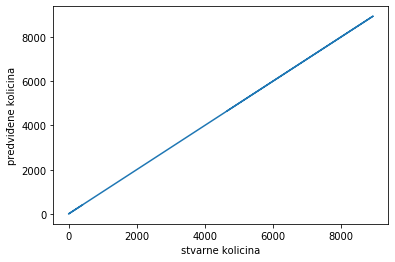

In [68]:
plt.plot(y_test, y_pred)
#plt.plot(x, x*model.score(X_test_scaled, y_test), color="red")
plt.xlabel("stvarne kolicina")
plt.ylabel("predviđene kolicina")